# Email classification using Naive Bayes classifier methods

Cette recherche examine une comparaison entre trois approches différentes pour classer les e-mails en fonction de leurs catégories.

1- Naive Bayes
2- Random Forest
3- SVNL

Naive Bayes Classifier est basé sur des probabilités conditionnelles. Il est rapide et fonctionne très bien avec un petit ensemble de données. Il considère les mots indépendants comme une caractéristique. Dans ce rapport nous presentons son utilisation

In [4]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


Extracting features
Accuracy: 96.15384615384616
matrice de confusion [[129   1]
 [  9 121]]

 Confusion matrix: 



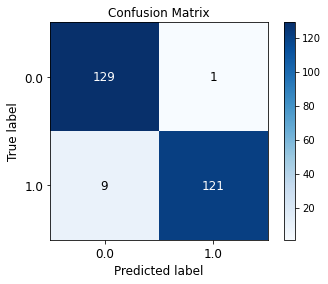



              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       130
         1.0       0.99      0.93      0.96       130

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260



In [5]:

from collections import Counter
import os
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt


data = {}


def build_data(root):
    all_words = []
    files = [os.path.join(root, file) for file in os.listdir(root)]

    global data

    for file in files:
        with open(file) as f:
            for line in f:
                words = line.split()
                all_words += words

    frequent = Counter(all_words)

    all_keys = list(frequent)

    for key in all_keys:
        if key.isalpha() == False:
            del frequent[key]

    frequent = frequent.most_common(2500)

    count = 0
    for word in frequent:
        data[word[0]] = count
        count += 1


def feature_extraction(root):
    files = [os.path.join(root, file) for file in os.listdir(root)]
    matrix = np.zeros((len(files), 2500))
    labels = np.zeros(len(files))
    file_count = 0

    for file in files:
        with open(file) as file_obj:
            for index, line in enumerate(file_obj):
                if index == 2:
                    line = line.split()
                    for word in line:
                        if word in data:
                            matrix[file_count, data[word]] = line.count(word)

        labels[file_count] = 0
        if 'spmsg' in file:
            labels[file_count] = 1
        file_count += 1
    return matrix, labels


if __name__ == '__main__':
    training_data = '/home/le/Documents/Python_Env/EMAIL/dataset/training-data'
    testing_data = '/home/le/Documents/Python_Env/EMAIL/dataset/testing-data'

    # Building word data
    build_data(training_data)

    print('Extracting features')
    training_feature_x, training_labels_y = feature_extraction(training_data)
    testing_features_x, testing_labels_y = feature_extraction(testing_data)

    model = GaussianNB()
    model.fit(training_feature_x, training_labels_y)

    # Predicting
    predicted_labels = model.predict(testing_features_x)
    print('Accuracy:', accuracy_score(testing_labels_y, predicted_labels) * 100)
    
    matrice_confusion = confusion_matrix(testing_labels_y, predicted_labels)

    print('matrice de confusion', matrice_confusion)
    print("\n Confusion matrix: \n")
    skplt.metrics.plot_confusion_matrix(testing_labels_y,predicted_labels, title="Confusion Matrix", text_fontsize='large')
    plt.show()
    print('\n')
    
    print (classification_report(testing_labels_y, model.predict(testing_features_x)))
     
     

# Conclusion 1

Avec la methode Naives Bayes, nous obtenons une precision de 96,1%. 
La matrice de confusion ci dessus nous aide a evaluer notre modele.